In [199]:
import pandas as pd
import numpy as np
import sklearn

In [200]:
!pip3 install xgboost

In [201]:
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, \
    gaussian_process
from xgboost import XGBClassifier

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [202]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [203]:
from pandas.plotting import scatter_matrix

In [204]:
data_raw = pd.read_csv("/Users/enfycius/Documents/kaggle/datasets/titanic/train.csv")

data_val = pd.read_csv("/Users/enfycius/Documents/kaggle/datasets/titanic/test.csv")

In [205]:
data1 = data_raw.copy(deep = True)

In [206]:
data_cleaner = [data1, data_val]

In [207]:
data_cleaner

[     PassengerId  Survived  Pclass   
 0              1         0       3  \
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp   
 0                              Braund, Mr. Owen Harris    male  22.0      1  \
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [208]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [209]:
data_raw.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
381,382,1,3,"Nakid, Miss. Maria (""Mary"")",female,1.0,0,2,2653,15.7417,NaN,C
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
688,689,0,3,"Fischer, Mr. Eberhard Thelander",male,18.0,0,0,350036,7.7958,NaN,S
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
578,579,0,3,"Caram, Mrs. Joseph (Maria Elias)",female,NaN,1,0,2689,14.4583,NaN,C
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",female,39.0,1,5,347082,31.2750,NaN,S
402,403,0,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S


In [210]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [211]:
data_val.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [212]:
data_raw.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# Clean Data

In [213]:
data_cleaner

[     PassengerId  Survived  Pclass   
 0              1         0       3  \
 1              2         1       1   
 2              3         1       3   
 3              4         1       1   
 4              5         0       3   
 ..           ...       ...     ...   
 886          887         0       2   
 887          888         1       1   
 888          889         0       3   
 889          890         1       1   
 890          891         0       3   
 
                                                   Name     Sex   Age  SibSp   
 0                              Braund, Mr. Owen Harris    male  22.0      1  \
 1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                               Heikkinen, Miss. Laina  female  26.0      0   
 3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                             Allen, Mr. William Henry    male  35.0      0   
 ..                                               

In [214]:
data1["Embarked"]

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [215]:
data1["Embarked"].mode()[0]

'S'

In [216]:
# data_cleaner = [data1, data_val]

for dataset in data_cleaner:
    dataset["Age"].fillna(dataset["Age"].median(), inplace=True)

    dataset["Embarked"].fillna(dataset["Embarked"].mode()[0], inplace=True)

    dataset["Fare"].fillna(dataset["Fare"].median(), inplace=True)


drop_column = ["PassengerId", "Cabin", "Ticket"]
data1.drop(drop_column, axis=1, inplace=True)

print(data1.isnull().sum())
print("-" * 10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [217]:
data1["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [218]:
data1["Name"].str.split(", ", expand=False)

0                              [Braund, Mr. Owen Harris]
1      [Cumings, Mrs. John Bradley (Florence Briggs T...
2                               [Heikkinen, Miss. Laina]
3         [Futrelle, Mrs. Jacques Heath (Lily May Peel)]
4                             [Allen, Mr. William Henry]
                             ...                        
886                              [Montvila, Rev. Juozas]
887                       [Graham, Miss. Margaret Edith]
888           [Johnston, Miss. Catherine Helen "Carrie"]
889                              [Behr, Mr. Karl Howell]
890                                [Dooley, Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [219]:
data1["Name"].str.split(", ", expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [220]:
dataset["Fare"]

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [221]:
pd.qcut(dataset["Fare"], 4)

0        (-0.001, 7.896]
1        (-0.001, 7.896]
2        (7.896, 14.454]
3        (7.896, 14.454]
4        (7.896, 14.454]
             ...        
413      (7.896, 14.454]
414    (31.472, 512.329]
415      (-0.001, 7.896]
416      (7.896, 14.454]
417     (14.454, 31.472]
Name: Fare, Length: 418, dtype: category
Categories (4, interval[float64, right]): [(-0.001, 7.896] < (7.896, 14.454] < (14.454, 31.472] < (31.472, 512.329]]

In [222]:
for dataset in data_cleaner:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

    dataset["IsAlone"] = 1
    dataset["IsAlone"].loc[dataset["FamilySize"] > 1] = 0

    dataset["Title"] = dataset["Name"].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

    dataset["FareBin"] = pd.qcut(dataset["Fare"], 4)

    dataset["AgeBin"] = pd.cut(dataset["Age"].astype(int), 5)

stat_min = 10

title_names = (data1["Title"].value_counts() < stat_min)

data1["Title"] = data1["Title"].apply(lambda x: "Misc" if title_names.loc[x] == True else x)


# print(data1["Title"].value_counts())
# print("-" * 10)

print(data1["Title"])
print(title_names)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Misc
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object
Title
Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
the Countess     True
Capt             True
Ms               True
Sir              True
Lady             True
Mme              True
Don              True
Jonkheer         True
Name: count, dtype: bool


/var/folders/6n/c06cm0zd2jq8s8vk4824sxvm0000gn/T/ipykernel_3310/2557037761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["IsAlone"].loc[dataset["FamilySize"] > 1] = 0
/var/folders/6n/c06cm0zd2jq8s8vk4824sxvm0000gn/T/ipykernel_3310/2557037761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset["IsAlone"].loc[dataset["FamilySize"] > 1] = 0


In [223]:
pd.cut(dataset["Age"].astype(int), 5)

0      (30.4, 45.6]
1      (45.6, 60.8]
2      (60.8, 76.0]
3      (15.2, 30.4]
4      (15.2, 30.4]
           ...     
413    (15.2, 30.4]
414    (30.4, 45.6]
415    (30.4, 45.6]
416    (15.2, 30.4]
417    (15.2, 30.4]
Name: Age, Length: 418, dtype: category
Categories (5, interval[float64, right]): [(-0.076, 15.2] < (15.2, 30.4] < (30.4, 45.6] < (45.6, 60.8] < (60.8, 76.0]]

In [224]:
test = pd.DataFrame({"test": [1], "colu": [2]})

In [225]:
test.iloc[lambda x: x.index == 0]

,test,colu
0,1,2


In [226]:
test.columns

Index(['test', 'colu'], dtype='object')

In [227]:
test.apply(lambda x: [10, 20] if x.iloc[0] == 1 else x, axis=1, result_type="expand")

,0,1
0,10,20


In [228]:
data1["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Misc
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [229]:
title_names

Title
Mr              False
Miss            False
Mrs             False
Master          False
Dr               True
Rev              True
Mlle             True
Major            True
Col              True
the Countess     True
Capt             True
Ms               True
Sir              True
Lady             True
Mme              True
Don              True
Jonkheer         True
Name: count, dtype: bool

In [230]:
data1["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Misc
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [231]:
data1.Title

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Misc
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [232]:
values_list = [[15, 2.5, 100], [20, 4.5, 50], [25, 5.2, 80],
               [45, 5.8, 48], [40, 6.3, 70], [41, 6.4, 90], 
               [51, 2.3, 111]]

In [233]:
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
                  index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

In [234]:
df = df.apply(lambda x: np.square(x) if x.name == 'Field_1' else x, axis=0)

In [235]:
df

,Field_1,Field_2,Field_3
a,225,2.5,100
b,400,4.5,50
c,625,5.2,80
d,2025,5.8,48
e,1600,6.3,70
f,1681,6.4,90
g,2601,2.3,111


In [236]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    object  
 3   Sex         891 non-null    object  
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Fare        891 non-null    float64 
 8   Embarked    891 non-null    object  
 9   FamilySize  891 non-null    int64   
 10  IsAlone     891 non-null    int64   
 11  Title       891 non-null    object  
 12  FareBin     891 non-null    category
 13  AgeBin      891 non-null    category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.9+ KB


In [237]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  FamilySize   418 non-null    int64   
 12  IsAlone      418 non-null    int64   
 13  Title        418 non-null    object  
 14  FareBin      418 non-null    category
 15  AgeBin       418 non-null    category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 47.1+ KB


In [238]:
data1.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
178,0,2,"Hale, Mr. Reginald",male,30.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
421,0,3,"Charters, Mr. David",male,21.0,0,0,7.7333,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
280,0,3,"Duane, Mr. Frank",male,65.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(64.0, 80.0]"
541,0,3,"Andersson, Miss. Ingeborg Constanzia",female,9.0,4,2,31.2750,S,7,0,Miss,"(31.0, 512.329]","(-0.08, 16.0]"
70,0,2,"Jenkin, Mr. Stephen Curnow",male,32.0,0,0,10.5000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
566,0,3,"Stoytcheff, Mr. Ilia",male,19.0,0,0,7.8958,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
571,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,51.4792,S,3,0,Mrs,"(31.0, 512.329]","(48.0, 64.0]"
833,0,3,"Augustsson, Mr. Albert",male,23.0,0,0,7.8542,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
449,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,30.5000,S,1,1,Misc,"(14.454, 31.0]","(48.0, 64.0]"
339,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,35.5000,S,1,1,Mr,"(31.0, 512.329]","(32.0, 48.0]"


In [239]:
label = LabelEncoder()

In [240]:
label

LabelEncoder()

In [241]:
for dataset in data_cleaner:
    dataset["Sex_Code"] = label.fit_transform(dataset["Sex"])
    dataset["Embarked_Code"] = label.fit_transform(dataset["Embarked"])
    dataset["Title_Code"] = label.fit_transform(dataset["Title"])
    dataset["AgeBin_Code"] = label.fit_transform(dataset["AgeBin"])
    dataset["FareBin_Code"] = label.fit_transform(dataset["FareBin"])

In [242]:
Target = ["Survived"]

In [243]:
data1_x = ["Sex", "Pclass", "Embarked", "Title", "SibSp", "Parch", "Age",
           "Fare", "FamilySize", "IsAlone"]

In [244]:
data1_x_calc = ["Sex_Code", "Pclass", "Embarked_Code", "Title_Code", "SibSp", "Parch", "Age", "Fare"]

In [245]:
data1_xy = Target + data1_x

In [246]:
data1_xy

['Survived',
 'Sex',
 'Pclass',
 'Embarked',
 'Title',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone']

In [247]:
data1_x_bin = ["Sex_Code", "Pclass", "Embarked_Code", "Title_Code", "FamilySize", "AgeBin_Code", "FareBin_Code"]

In [248]:
data1_xy_bin = Target + data1_x_bin

In [249]:
data1_xy_bin

['Survived',
 'Sex_Code',
 'Pclass',
 'Embarked_Code',
 'Title_Code',
 'FamilySize',
 'AgeBin_Code',
 'FareBin_Code']

In [250]:
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]",1,2,1,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,0,3,1,2


In [251]:
data1_dummy = pd.get_dummies(data1[data1_x])

In [252]:
data1_dummy

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,0,27.0,13.0000,1,1,False,True,False,False,True,False,True,False,False,False
887,1,0,0,19.0,30.0000,1,1,True,False,False,False,True,False,False,True,False,False
888,3,1,2,28.0,23.4500,4,0,True,False,False,False,True,False,False,True,False,False
889,1,0,0,26.0,30.0000,1,1,False,True,True,False,False,False,False,False,True,False


In [253]:
data1_x_dummy = data1_dummy.columns.tolist()

In [254]:
Target

['Survived']

In [255]:
data1_xy_dummy = Target + data1_x_dummy

In [256]:
data1_xy_dummy

['Survived',
 'Pclass',
 'SibSp',
 'Parch',
 'Age',
 'Fare',
 'FamilySize',
 'IsAlone',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Title_Master',
 'Title_Misc',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs']

In [257]:
type(data1_xy_dummy)

list

In [258]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,False,True,False,False,True,False,False,False,True,False
1,1,1,0,38.0,71.2833,2,0,True,False,True,False,False,False,False,False,False,True
2,3,0,0,26.0,7.9250,1,1,True,False,False,False,True,False,False,True,False,False
3,1,1,0,35.0,53.1000,2,0,True,False,False,False,True,False,False,False,False,True
4,3,0,0,35.0,8.0500,1,1,False,True,False,False,True,False,False,False,True,False


# Da-Double Check Cleaned Data

In [259]:
data1.isnull().sum()

Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64

In [260]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   FamilySize     891 non-null    int64   
 10  IsAlone        891 non-null    int64   
 11  Title          891 non-null    object  
 12  FareBin        891 non-null    category
 13  AgeBin         891 non-null    category
 14  Sex_Code       891 non-null    int64   
 15  Embarked_Code  891 non-null    int64   
 16  Title_Code     891 non-null    int64   
 17  AgeBin_Code    891 non-null    int6

In [261]:
data_val.isnull().sum()

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64

In [262]:
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Pclass         418 non-null    int64   
 2   Name           418 non-null    object  
 3   Sex            418 non-null    object  
 4   Age            418 non-null    float64 
 5   SibSp          418 non-null    int64   
 6   Parch          418 non-null    int64   
 7   Ticket         418 non-null    object  
 8   Fare           418 non-null    float64 
 9   Cabin          91 non-null     object  
 10  Embarked       418 non-null    object  
 11  FamilySize     418 non-null    int64   
 12  IsAlone        418 non-null    int64   
 13  Title          418 non-null    object  
 14  FareBin        418 non-null    category
 15  AgeBin         418 non-null    category
 16  Sex_Code       418 non-null    int64   
 17  Embarked_Code  418 non-null    int6

In [263]:
data_raw

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [264]:
data_raw.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [265]:
data_raw.describe(include = None)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Split Training and Testing Data

In [266]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state=0)

In [267]:
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]",1,2,1,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,0,3,1,2


In [268]:
data1_x_bin

['Sex_Code',
 'Pclass',
 'Embarked_Code',
 'Title_Code',
 'FamilySize',
 'AgeBin_Code',
 'FareBin_Code']

In [269]:
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target], random_state=0)

In [270]:
train1_x_bin

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1
...,...,...,...,...,...,...,...
835,0,1,0,2,3,2,3
192,0,3,2,2,2,1,0
629,1,3,1,3,1,1,0
559,0,3,2,4,2,2,2


In [271]:
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy],
                                                                                                data1[Target], random_state=0)

In [272]:
data1.shape

(891, 19)

In [273]:
train1_x.shape

(668, 8)

In [274]:
test1_x.shape

(223, 8)

In [275]:
train1_x_bin.head()

,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


# Perform Exploratory Analysis with Statistics

In [276]:
for x in data1_x:
    if data1[x].dtype != "float64":
        print(x)
        print(data1[[x, Target[0]]].groupby(x, as_index=False).mean())
        print()
        print(data1[[x, Target[0]]].groupby(x, as_index=True).mean())

Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908

        Survived
Sex             
female  0.742038
male    0.188908
Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

          Survived
Embarked          
C         0.553571
Q         0.389610
S         0.339009
Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000

        Survived
Title           
Master  0.575000
Misc    0.444444
Miss    0.697802
Mr      0.156673
Mrs     0.792000
SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000

       Survived
SibSp          
0      0.345395
1      0.535885
2      0.464286
3      0.250000
4   

In [277]:
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]",1,2,1,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,0,3,1,2


In [278]:
Target[0]

'Survived'

In [279]:
data1["Title"]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Misc
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [280]:
data1[Target[0]]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [281]:
pd.crosstab(data1["Title"], data1[Target[0]])

Survived,0,1
Title,,
Master,17,23
Misc,15,12
Miss,55,127
Mr,436,81
Mrs,26,99


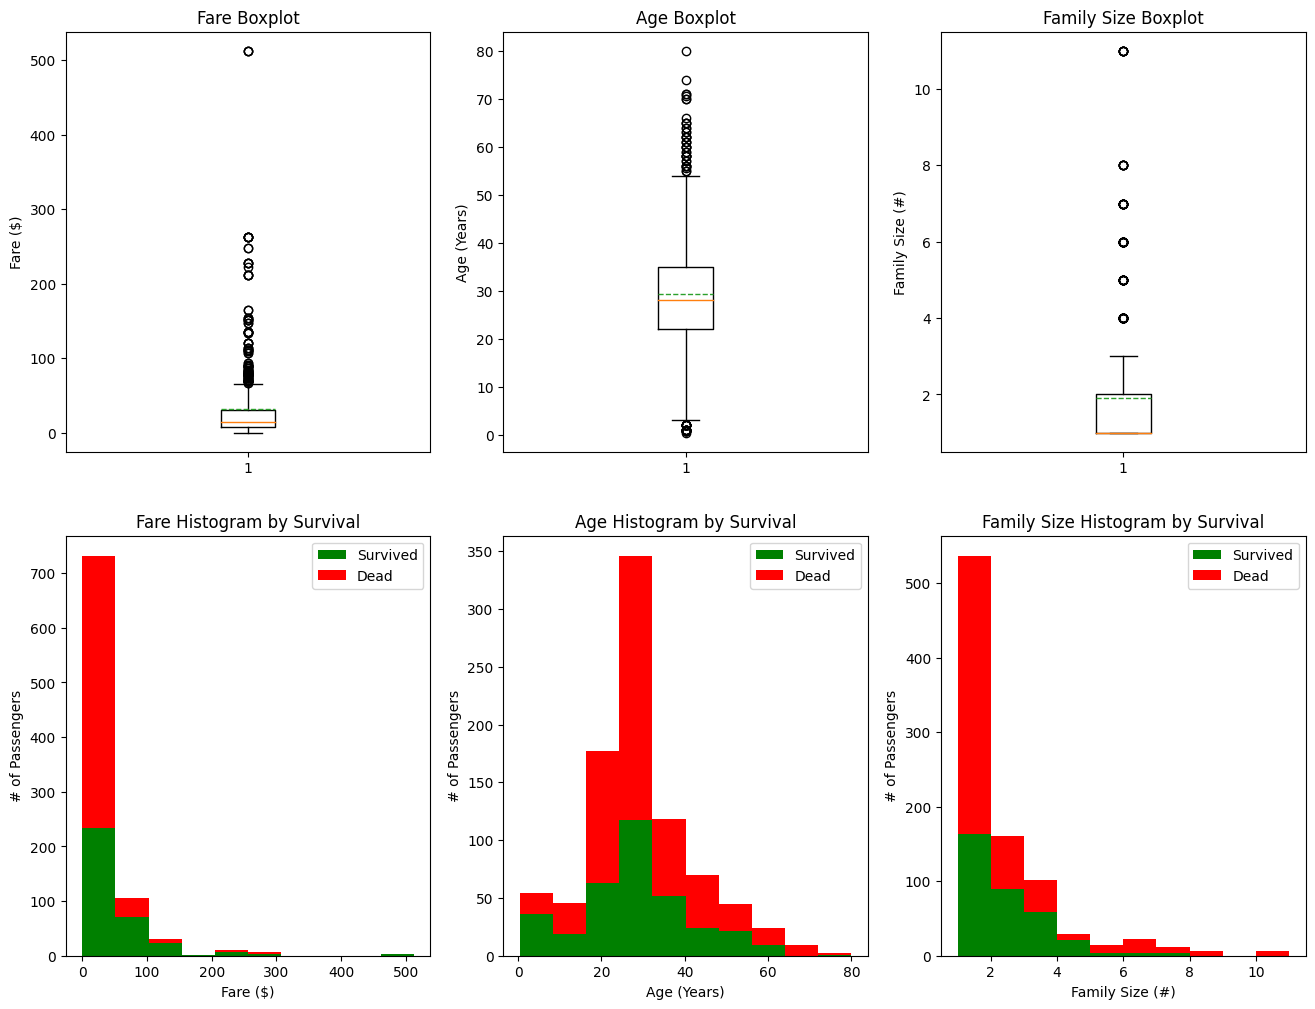

In [282]:
plt.figure(figsize=[16, 12])

plt.subplot(231)
plt.boxplot(x=data1["Fare"], showmeans = True, meanline = True)
plt.title("Fare Boxplot")
plt.ylabel("Fare ($)")

plt.subplot(232)
plt.boxplot(data1["Age"], showmeans = True, meanline = True)
plt.title("Age Boxplot")
plt.ylabel("Age (Years)")

plt.subplot(233)
plt.boxplot(data1["FamilySize"], showmeans = True, meanline = True)
plt.title("Family Size Boxplot")
plt.ylabel("Family Size (#)")

plt.subplot(234)
plt.hist(x = [data1[data1["Survived"] == 1]["Fare"], data1[data1["Survived"] == 0]["Fare"]], stacked=True,
         color=["g", "r"], label=["Survived", "Dead"])
plt.title("Fare Histogram by Survival")
plt.xlabel("Fare ($)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(235)
plt.hist(x = [data1[data1["Survived"] == 1]["Age"], data1[data1["Survived"] == 0]["Age"]],
         stacked = True, color = ["g", "r"], label = ["Survived", "Dead"])
plt.title("Age Histogram by Survival")
plt.xlabel("Age (Years)")
plt.ylabel("# of Passengers")
plt.legend()

plt.subplot(236)
plt.hist(x = [data1[data1["Survived"] == 1]["FamilySize"], data1[data1["Survived"] == 0]["FamilySize"]],
         stacked = True, color = ["g", "r"], label = ["Survived", "Dead"])
plt.title("Family Size Histogram by Survival")
plt.xlabel("Family Size (#)")
plt.ylabel("# of Passengers")
plt.legend()

<Axes: xlabel='FamilySize', ylabel='Survived'>

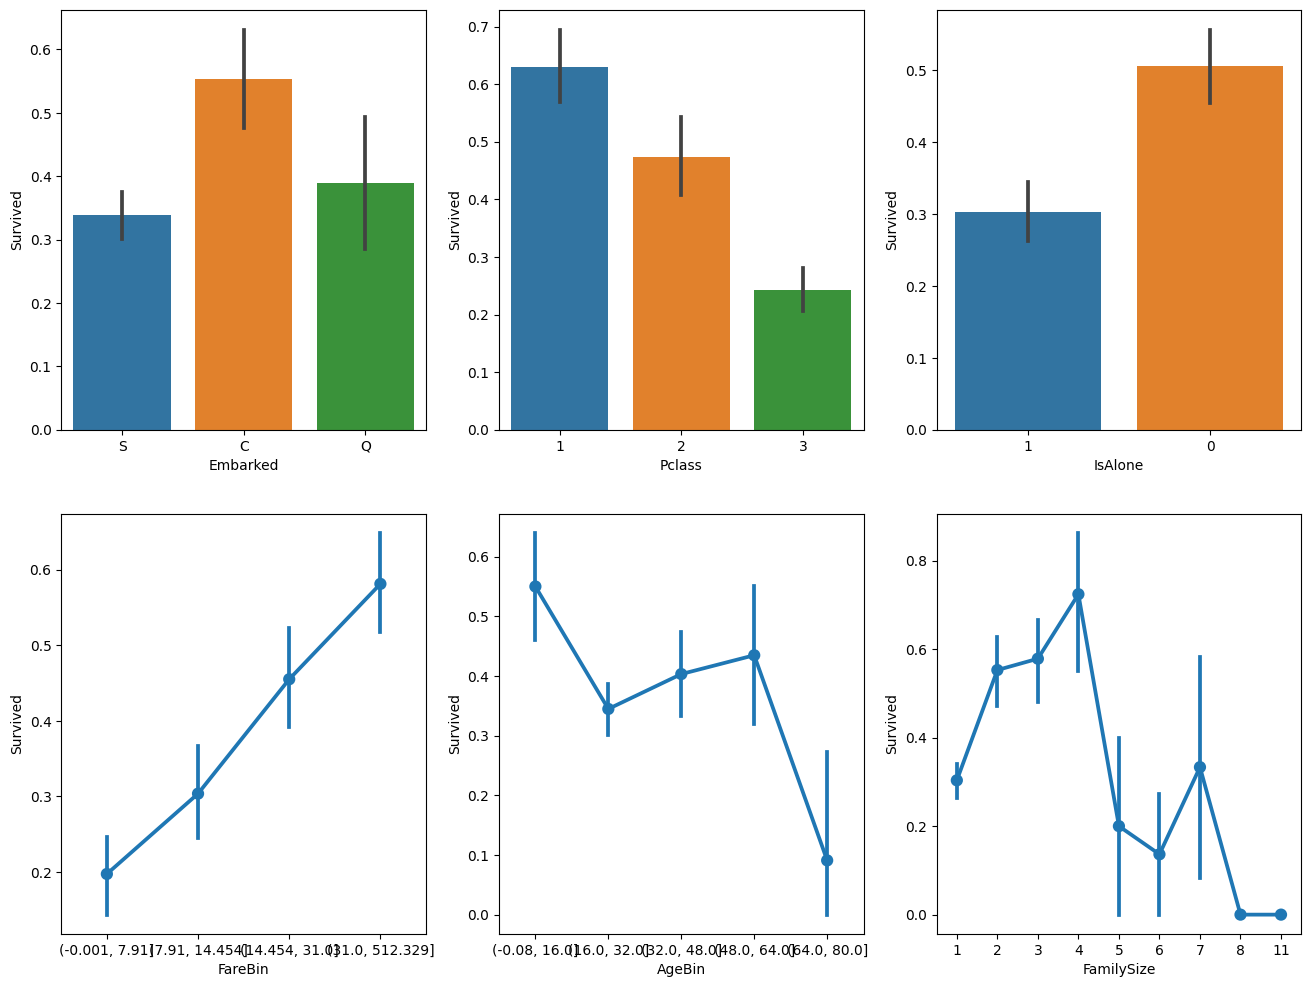

In [283]:
fig, saxis = plt.subplots(2, 3, figsize=(16, 12))

sns.barplot(x = "Embarked", y = "Survived", data = data1, ax = saxis[0, 0])
sns.barplot(x = "Pclass", y = "Survived", order=[1, 2, 3], data = data1, ax = saxis[0, 1])
sns.barplot(x = "IsAlone", y = "Survived", order = [1, 0], data = data1, ax = saxis[0, 2])

sns.pointplot(x = "FareBin", y = "Survived", data = data1, ax = saxis[1, 0])
sns.pointplot(x = "AgeBin", y = "Survived", data = data1, ax = saxis[1, 1])
sns.pointplot(x = "FamilySize", y = "Survived", data = data1, ax = saxis[1, 2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

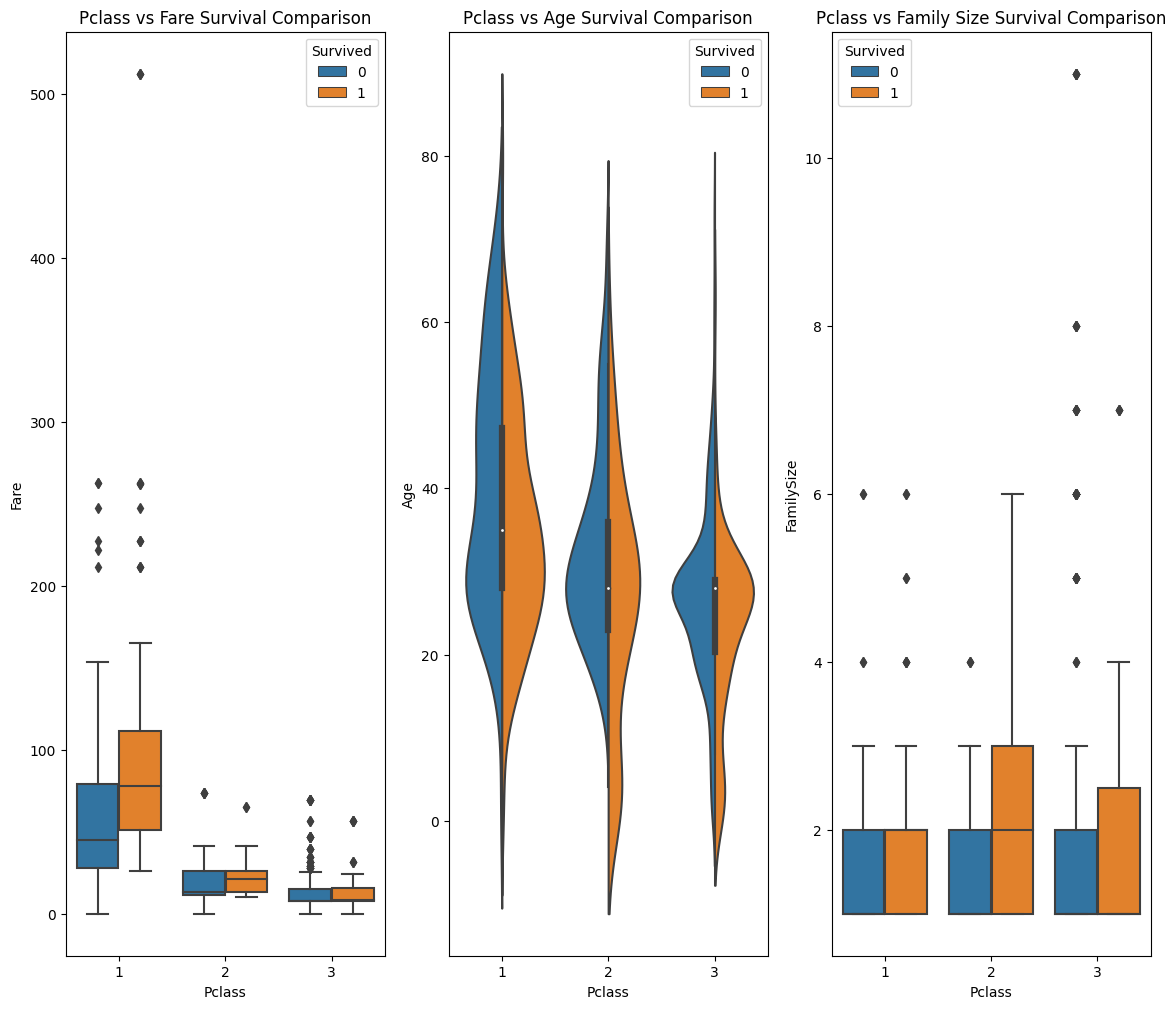

In [284]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(14, 12))

sns.boxplot(x = "Pclass", y = "Fare", hue = "Survived", data = data1, ax = axis1)
axis1.set_title("Pclass vs Fare Survival Comparison")

sns.violinplot(x = "Pclass", y = "Age", hue = "Survived", data = data1, split = True, ax = axis2)
axis2.set_title("Pclass vs Age Survival Comparison")

sns.boxplot(x = "Pclass", y = "FamilySize", hue = "Survived", data = data1, ax = axis3)
axis3.set_title("Pclass vs Family Size Survival Comparison")

In [285]:
data1["Survived"]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [286]:
data1["Sex"]

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

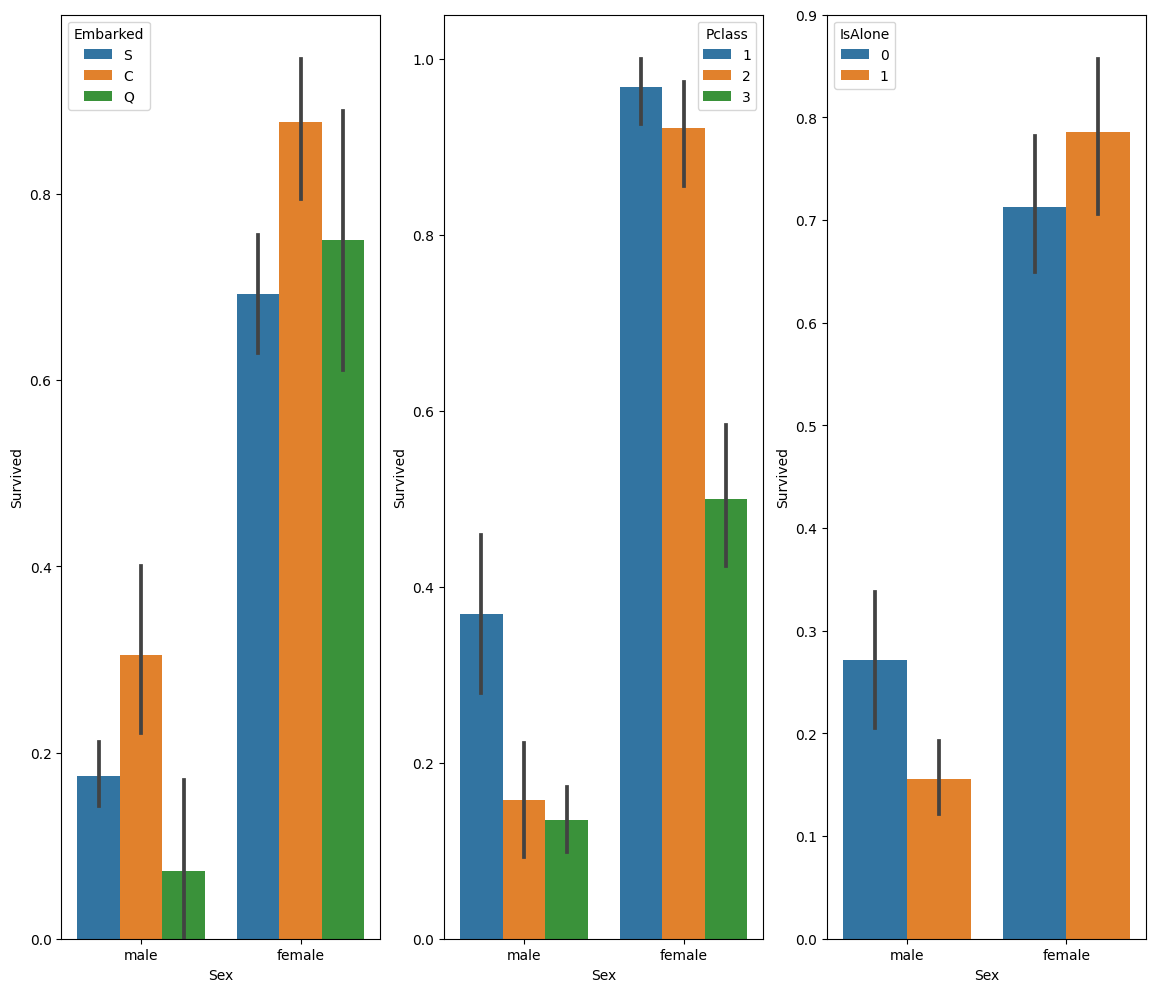

In [287]:
fig, qaxis = plt.subplots(1, 3, figsize=(14, 12))

sns.barplot(x = "Sex", y = "Survived", hue = "Embarked", data = data1, ax = qaxis[0])
axis1.set_title("Sex vs Embarked Survival Comparison")

sns.barplot(x = "Sex", y = "Survived", hue = "Pclass", data = data1, ax = qaxis[1])
axis1.set_title("Sex vs Pclass Survival Comparison")

sns.barplot(x = "Sex", y = "Survived", hue = "IsAlone", data = data1, ax = qaxis[2])
axis1.set_title("Sex vs IsAlone Survival Comparison")

<Axes: xlabel='Pclass', ylabel='Survived'>

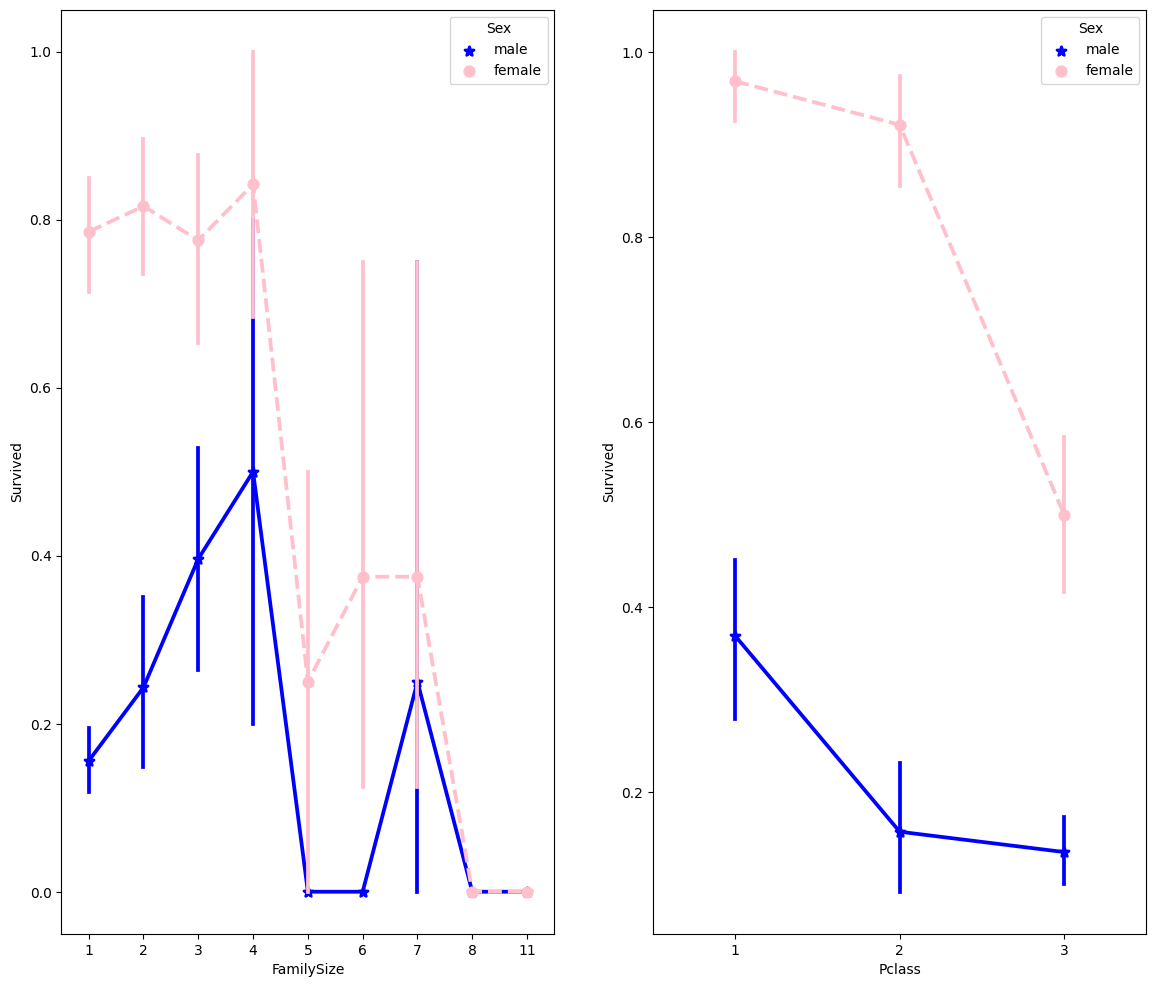

In [288]:
fig, (maxis1, maxis2) = plt.subplots(1, 2, figsize=(14, 12))

sns.pointplot(x = "FamilySize", y = "Survived", hue = "Sex", data = data1,
              palette = {"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = data1, 
              palette = {"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Us

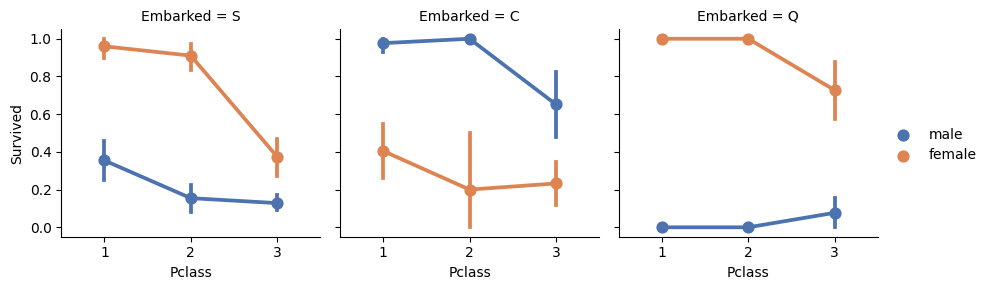

In [289]:
e = sns.FacetGrid(data1, col = "Embarked")
e.map(sns.pointplot, "Pclass", "Survived", "Sex", ci=95.0, palette = "deep")
e.add_legend()

/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


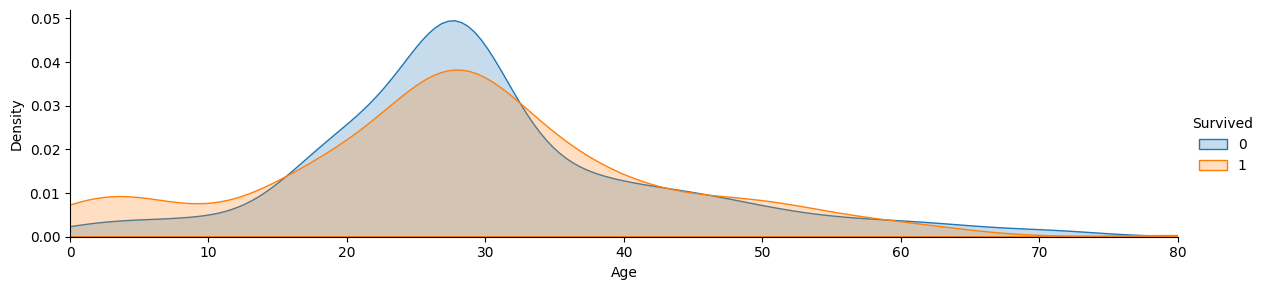

In [290]:
a = sns.FacetGrid(data1, hue = "Survived", aspect = 4)
a.map(sns.kdeplot, "Age", shade = True)
a.set(xlim=(0, data1["Age"].max()))
a.add_legend()

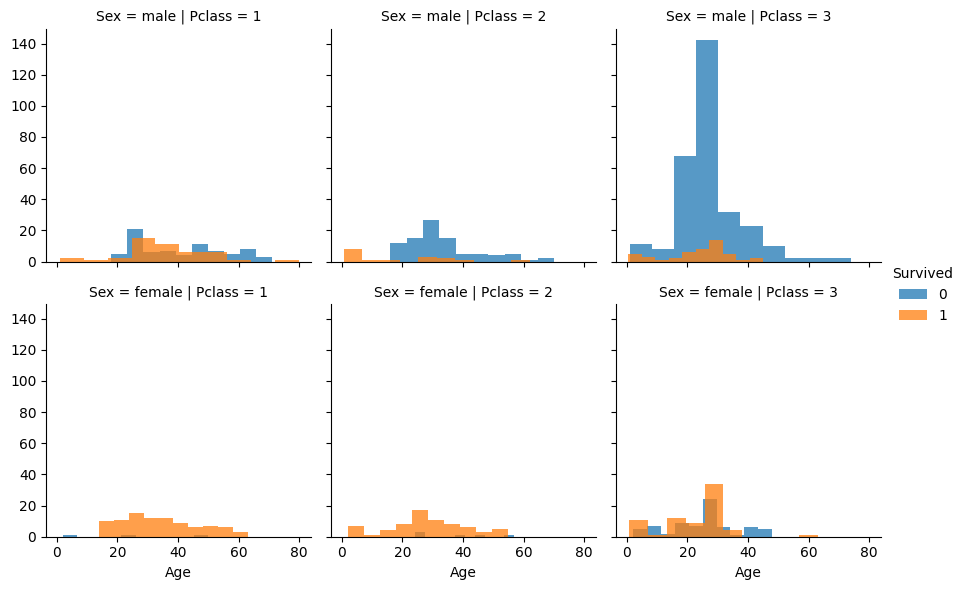

In [291]:
h = sns.FacetGrid(data1, row = "Sex", col = "Pclass", hue = "Survived")
h.map(plt.hist, "Age", alpha = .75)
h.add_legend()

/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:1507: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, 

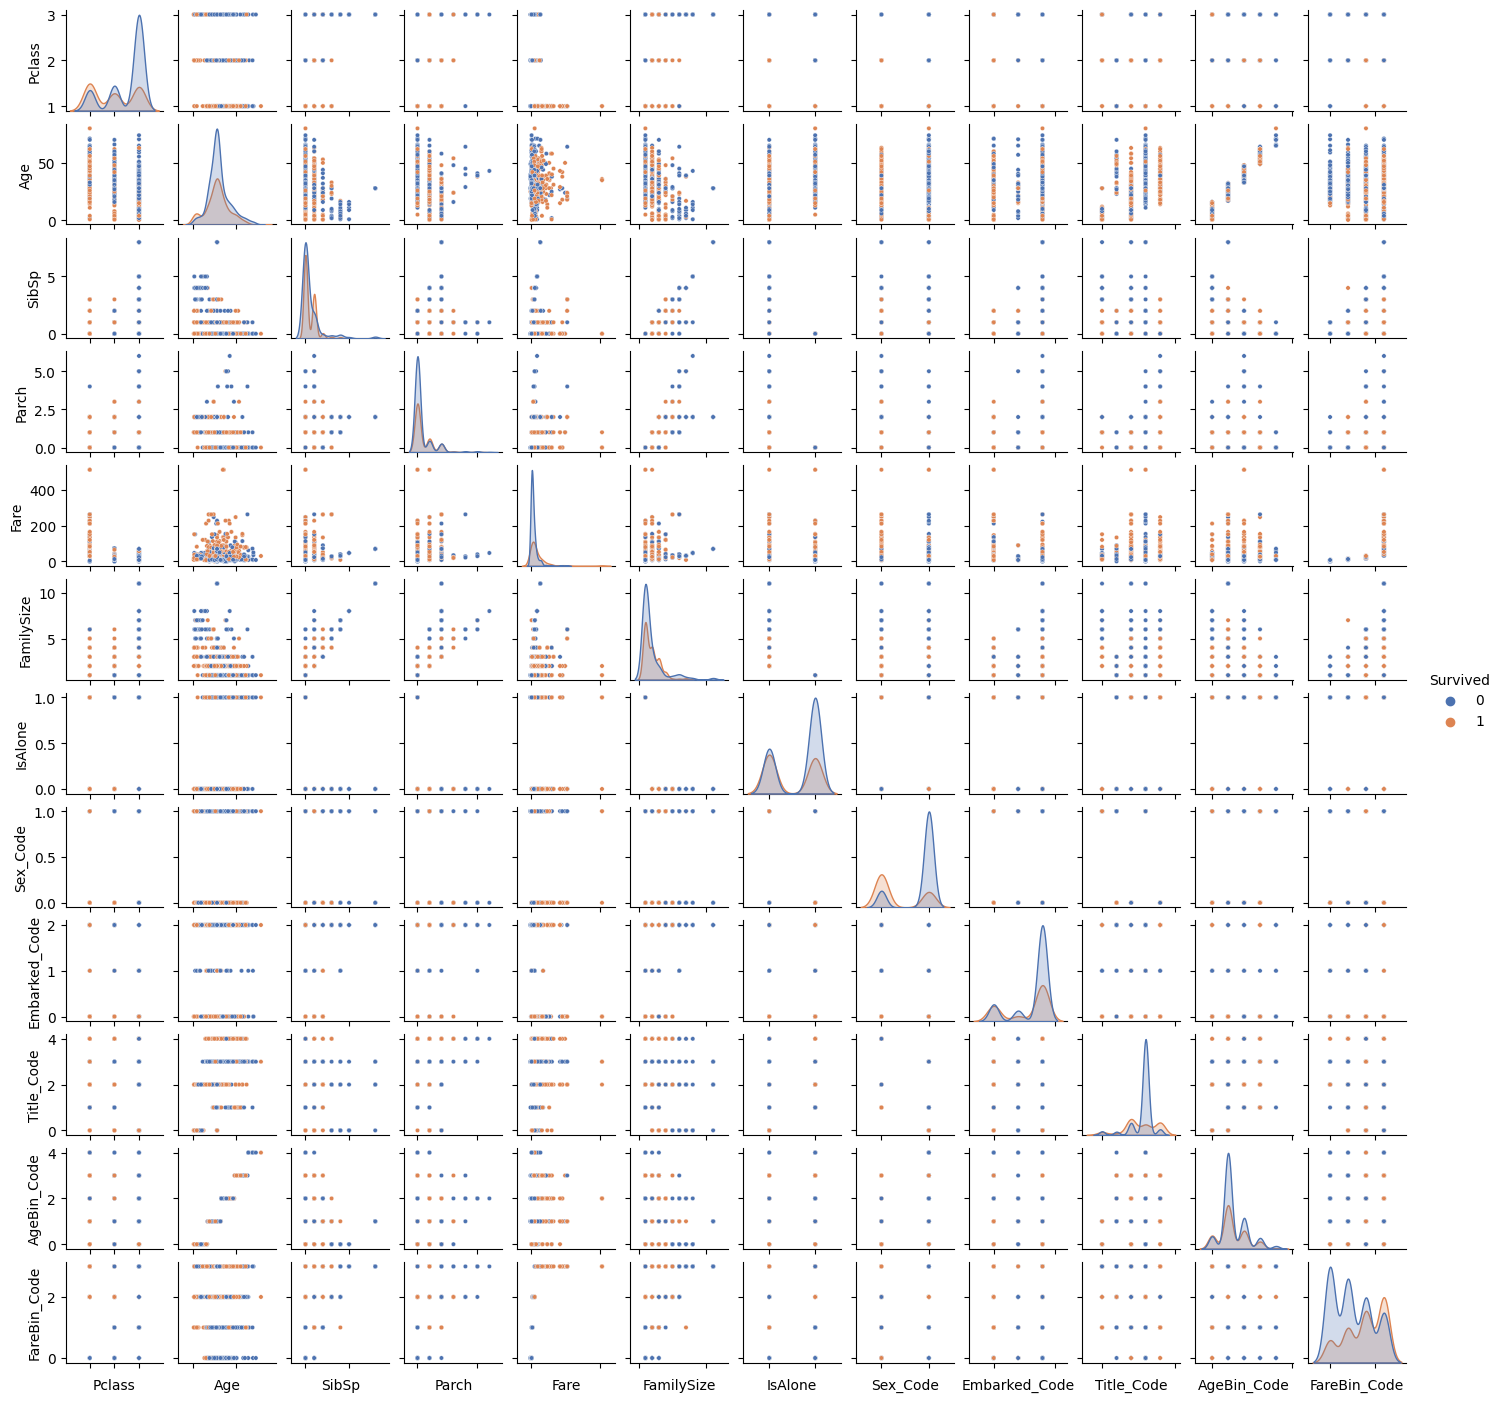

In [292]:
pp = sns.pairplot(data1, hue = "Survived", palette = "deep", size = 1.2, 
                  diag_kind = "kde", diag_kws = dict(shade=True), plot_kws=dict(s=10))
pp.set(xticklabels=[])

In [293]:
def correlation_heatmap(df):
    _, ax = plt.subplots(figsize=(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)

    _ = sns.heatmap(
        df.corr(),
        cmap = colormap,
        square = True,
        cbar_kws = {"shrink": .9},
        ax = ax,
        annot = True,
        linewidths=0.1, vmax=1.0, linecolor="white",
        annot_kws = {"fontsize": 12}
    )

    plt.title("Pearson Correlation of Features", y = 1.05, size=15)

In [294]:
data1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin,Sex_Code,Embarked_Code,Title_Code,AgeBin_Code,FareBin_Code
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,0,Mr,"(-0.001, 7.91]","(16.0, 32.0]",1,2,3,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,0,4,2,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,1,Miss,"(7.91, 14.454]","(16.0, 32.0]",0,2,2,1,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,0,Mrs,"(31.0, 512.329]","(32.0, 48.0]",0,2,4,2,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,1,Mr,"(7.91, 14.454]","(32.0, 48.0]",1,2,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,1,1,Misc,"(7.91, 14.454]","(16.0, 32.0]",1,2,1,1,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,1,1,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,23.4500,S,4,0,Miss,"(14.454, 31.0]","(16.0, 32.0]",0,2,2,1,2
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,1,1,Mr,"(14.454, 31.0]","(16.0, 32.0]",1,0,3,1,2


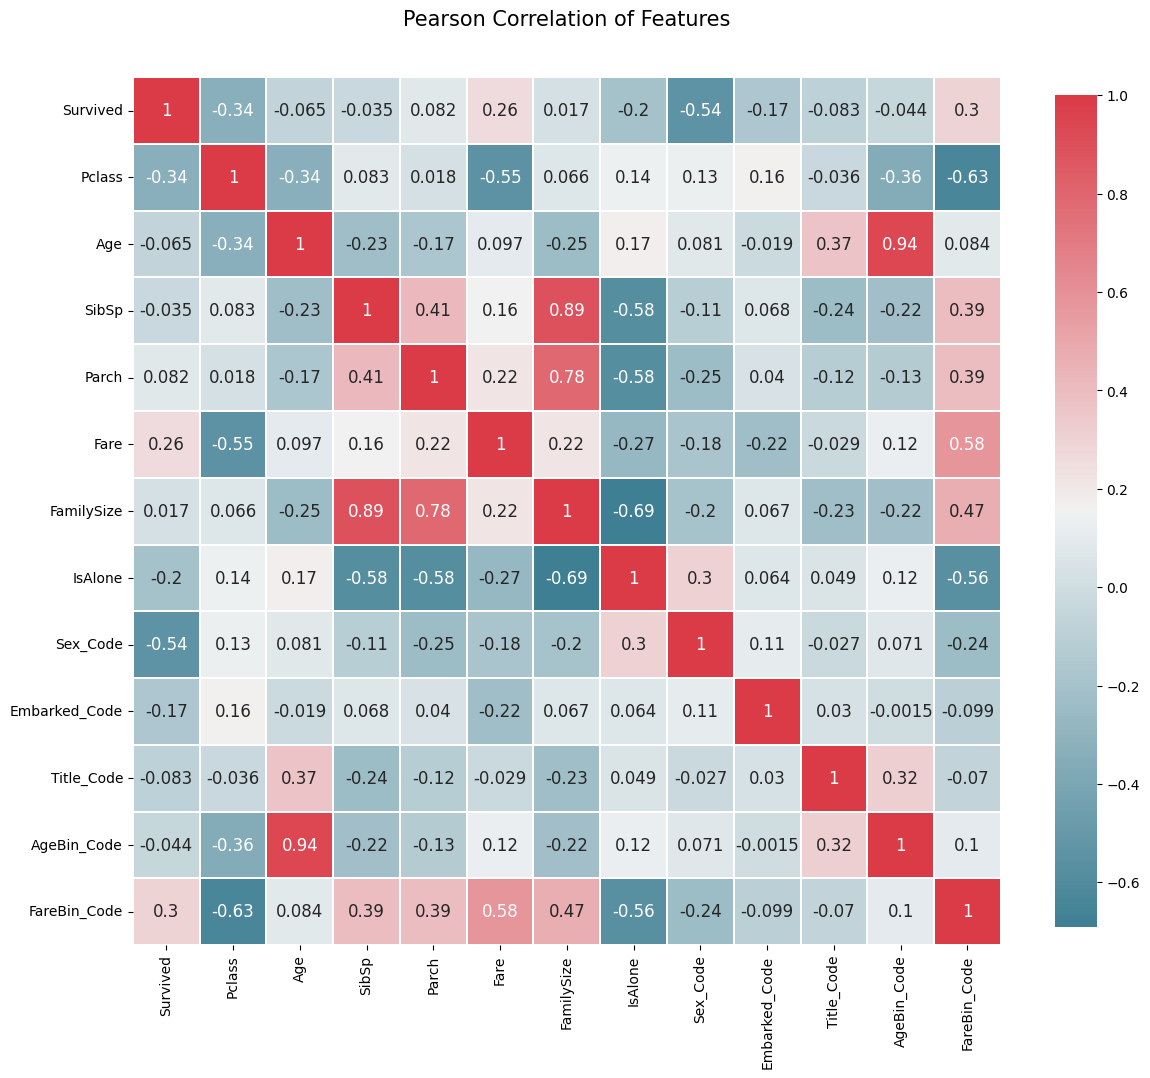

In [296]:
correlation_heatmap(data1.drop(columns=["Name", "Sex", "Embarked", "Title", "FareBin", "AgeBin"]))

# Model Data

In [299]:
MLA = [
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    gaussian_process.GaussianProcessClassifier(),

    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model.RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),

    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),

    neighbors.KNeighborsClassifier(),

    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),

    tree.DecisionTreeClassifier(),
    tree.ExtraTreeClassifier(),

    discriminant_analysis.LinearDiscriminantAnalysis(),
    discriminant_analysis.QuadraticDiscriminantAnalysis(),

    XGBClassifier()
]

In [300]:
cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)

In [301]:
MLA_columns = ["MLA Name", "MLA Parameters", "MLA Train Accuracy Mean",
               "MLA Test Accuracy Mean", "MLA Test Accuracy 3*STD", "MLA Time"]
MLA_compare = pd.DataFrame(columns = MLA_columns)

In [302]:
MLA_predict = data1[Target]

In [303]:
MLA_predict

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [305]:
row_index = 0

for alg in MLA:
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, "MLA Name"] = MLA_name
    MLA_compare.loc[row_index, "MLA Parameters"] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, data1[data1_x_bin], data1[Target], cv = cv_split, return_train_score=True)

    MLA_compare.loc[row_index, "MLA Time"] = cv_results["fit_time"].mean()
    MLA_compare.loc[row_index, "MLA Train Accuracy Mean"] = cv_results["train_score"].mean()
    MLA_compare.loc[row_index, "MLA Test Accuracy Mean"] = cv_results["test_score"].mean()
    MLA_compare.loc[row_index, "MLA Test Accuracy 3*STD"] = cv_results["test_score"].std() * 3

    alg.fit(data1[data1_x_bin], data1[Target])
    MLA_predict[MLA_name] = alg.predict(data1[data1_x_bin])

    row_index += 1


/Users/enfycius/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/enfycius/miniconda3/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was e

In [306]:
MLA_compare.sort_values(by = ["MLA Test Accuracy Mean"], ascending=False, inplace=True)

In [307]:
MLA_compare

,MLA Name,MLA Parameters,MLA Train Accuracy Mean,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
4,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.895131,0.830224,0.068686,0.053362
14,SVC,"{'C': 1.0, 'break_ties': False, 'cache_size': ...",0.835206,0.827612,0.040916,0.017533
21,XGBClassifier,"{'objective': 'binary:logistic', 'base_score':...",0.890824,0.826866,0.054656,0.193241
15,NuSVC,"{'break_ties': False, 'cache_size': 200, 'clas...",0.834082,0.826119,0.045663,0.019845
2,ExtraTreesClassifier,"{'bootstrap': False, 'ccp_alpha': 0.0, 'class_...",0.895131,0.822761,0.058435,0.043813
3,GradientBoostingClassifier,"{'ccp_alpha': 0.0, 'criterion': 'friedman_mse'...",0.866667,0.822761,0.049873,0.031866
1,BaggingClassifier,"{'base_estimator': 'deprecated', 'bootstrap': ...",0.891386,0.821642,0.073028,0.009563
17,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.820522,0.054484,0.001151
18,ExtraTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.895131,0.817164,0.053451,0.000958
0,AdaBoostClassifier,"{'algorithm': 'SAMME.R', 'base_estimator': 'de...",0.820412,0.81194,0.049861,0.02598


Text(0, 0.5, 'Algorithms')

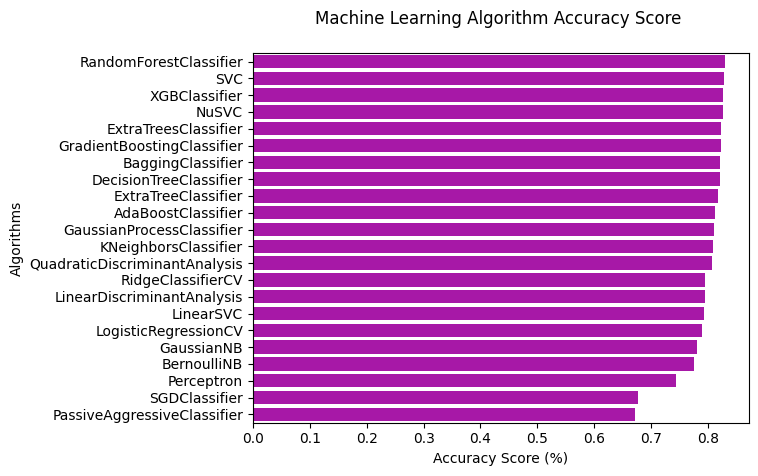

In [309]:
sns.barplot(x="MLA Test Accuracy Mean", y = "MLA Name", data = MLA_compare, color = "m")

plt.title("Machine Learning Algorithm Accuracy Score \n")
plt.xlabel("Accuracy Score (%)")
plt.ylabel("Algorithms")